# Capstone project for Luisa Fernanda Meza

![Course Hero](images/hero.png)

## Introduction

Describe what is your capstone project about.

## Data Set Selection

Mention the data set you selected for your capstone project, where did you find it, and why it was interesting to you

## Data Examination

Let's start with the imports for the notebook.

Note: Remember to add in the `requirements.txt` file all the modules you use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Get the selected data set into a pandas Dataframe.

Note: You need to add the right method to load the data.

In [2]:
movies = pd.read_csv("imdb_top_1000.csv")

Find relevant information about the selected dataset.

- How many rows and columns does it has?
- Which characteristics does each column has?
    - Data type
    - Minimum and maximum values
    - Values distribution
    - Missing data
- Which columns are related or are dependent on each other? 
    - Which ones can be derived?
    - Which are good candidates for an hypothesis?

Note: Use pandas methods as shape, head, sample, groupby, describe and any other you can think of!

In [3]:
print("Shape: ", movies.shape)

Shape:  (1000, 16)


In [566]:
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [4]:
movies.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [5]:
movies.describe(include="object")

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"4,360,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [6]:
movies.groupby(["Released_Year"])["Series_Title"].count().sort_values(ascending=False)

Released_Year
2014    32
2004    31
2009    29
2016    28
2013    28
        ..
1930     1
1926     1
1924     1
1922     1
PG       1
Name: Series_Title, Length: 100, dtype: int64

In [7]:
movies.groupby(["Released_Year"])["IMDB_Rating"].count().sort_values(ascending=False)

Released_Year
2014    32
2004    31
2009    29
2016    28
2013    28
        ..
1930     1
1926     1
1924     1
1922     1
PG       1
Name: IMDB_Rating, Length: 100, dtype: int64

## Define the Hypothesis to test

Decide what is your project about.

What do you want to predict?

`Elaborate here`

## Clean the data

Create a new Data Frame just with the data you are going to use

In [8]:
cMovies=movies[["Released_Year", "Runtime", "IMDB_Rating", "Genre","Meta_score"]].copy()

In [9]:
cMovies["Runtime"] =cMovies["Runtime"].replace('min','', regex=True)
cMovies["Runtime"] =pd.to_numeric(cMovies["Runtime"])

In [10]:
genre1=[]
for index, row in cMovies.iterrows():
    a=row["Genre"].split()
    if(len(a)>1):
        genre1.append(a[1])
    else:
        genre1.append(a[0])
cMovies["Genre1"]=genre1

In [11]:
cMovies=cMovies[["Released_Year", "Runtime", "IMDB_Rating", "Genre1", "Meta_score"]].copy()
cMovies = cMovies.rename(columns={"Genre1": "Genre","Released_Year":"Year","IMDB_Rating":"Rating"})
cMovies["Genre"] =cMovies["Genre"].replace(',','', regex=True)

In [12]:
cMovies=cMovies.sort_values('Year', ascending=True)

In [13]:
cMovies.head()

,Year,Runtime,Rating,Genre,Meta_score
321,1920,76,8.1,Horror,NaN
127,1921,68,8.3,Drama,NaN
568,1922,94,7.9,Horror,NaN
194,1924,45,8.2,Comedy,NaN
193,1925,95,8.2,Comedy,NaN


In [14]:
cMovies.drop(cMovies.tail(1).index,inplace=True)
cMovies.dropna(subset=["Meta_score"], inplace=True)

## Run your experiment(s)

Describe what your experiment is done, and execute it.

Note: Be generous with your plots!

In [15]:
import seaborn as sns

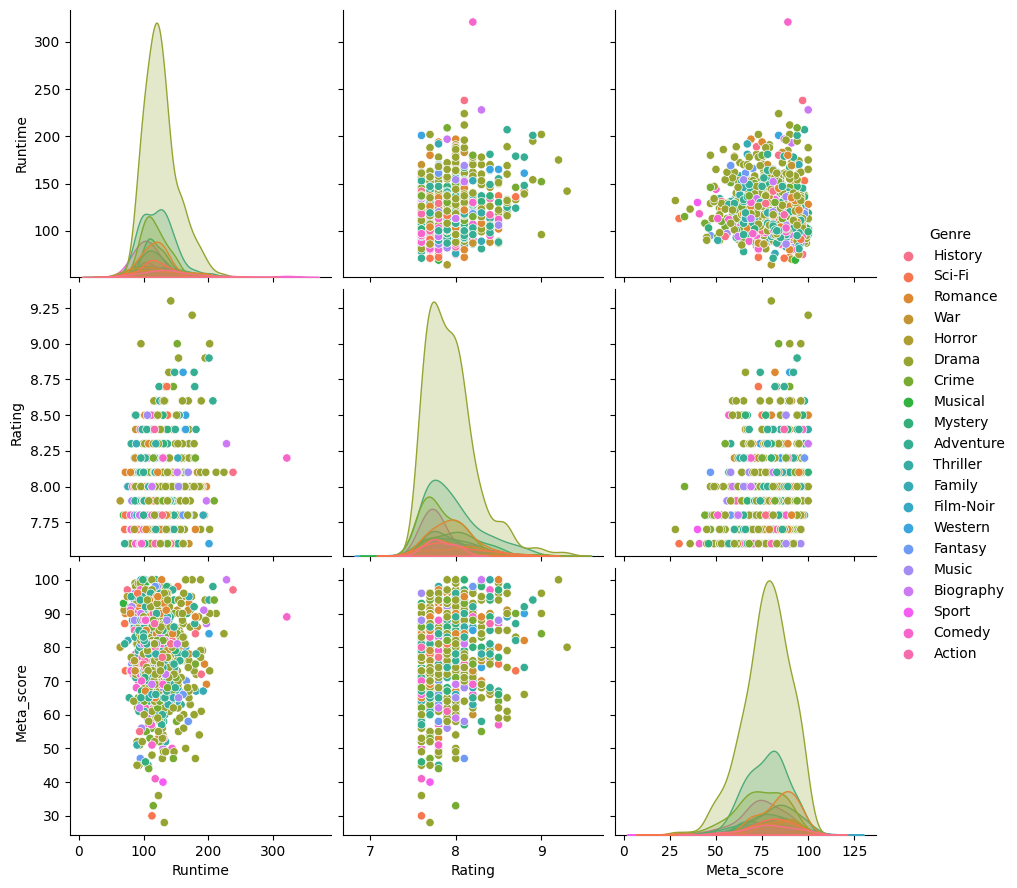

In [579]:
sns.pairplot(cMovies, hue='Genre', height=3)
plt.show()

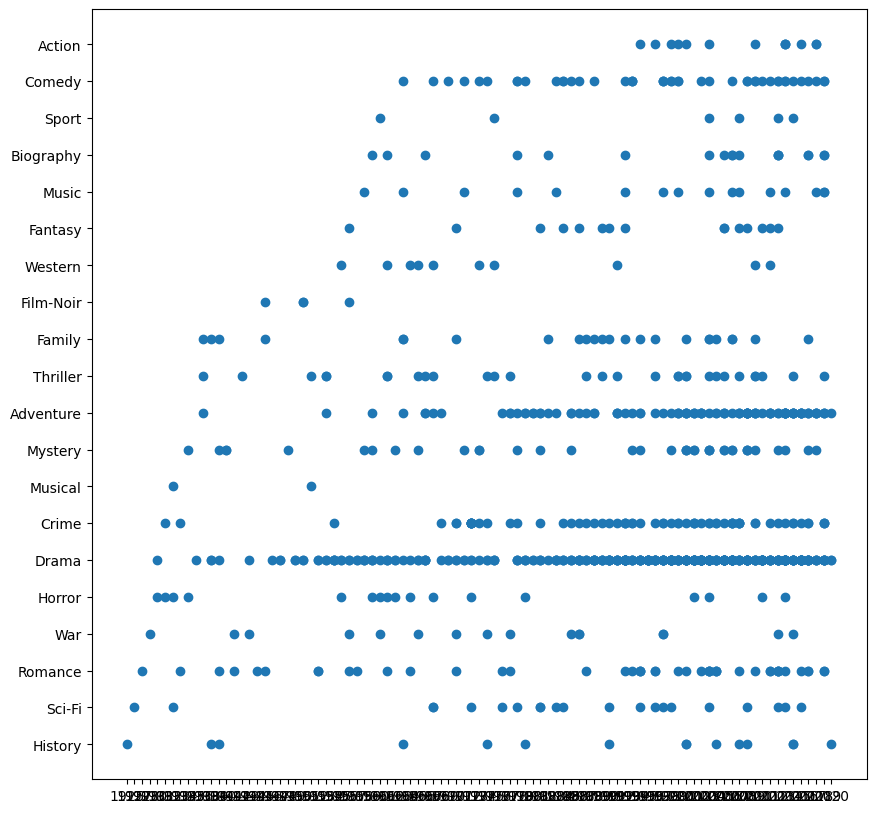

In [363]:
Yval=cMovies["Year"]
Xval=cMovies["Genre"]
plt.figure(figsize=(10,10))
plt.scatter(Yval,Xval)
plt.show()

In [366]:
y=cMovies["Genre"]
X=cMovies["Year"]

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("X Train Size: ", len(X_train), "; Y Test Size", len(X_test))
print("Y Train Size: ", len(y_train), "; Y Test Size", len(y_test))


X Train Size:  673 ; Y Test Size 169
Y Train Size:  673 ; Y Test Size 169


In [356]:
clf = KNeighborsClassifier(
    metric="euclidean"
)
X_train=X_train.values.reshape(-1,1)
clf.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [357]:
print(clf.predict([[168]]))

[80.]


In [358]:
X_test=X_test.values.reshape(-1,1)
predictions = clf.predict(X_test)
print(predictions)

[56. 69. 52. 86. 62. 52. 84. 66. 72. 69. 61. 70. 45. 74. 76. 49. 76. 70.
 63. 72. 59. 41. 77. 63. 45. 49. 33. 75. 61. 61. 76. 84. 70. 47. 47. 70.
 76. 63. 69. 89. 58. 30. 54. 75. 56. 66. 86. 66. 79. 63. 90. 70. 63. 65.
 45. 54. 33. 72. 62. 69. 75. 79. 58. 80. 72. 76. 47. 47. 57. 96. 59. 56.
 30. 50. 62. 62. 73. 51. 80. 49. 75. 71. 51. 70. 79. 62. 70. 77. 76. 96.
 79. 62. 70. 62. 70. 84. 62. 86. 64. 75. 33. 62. 62. 58. 63. 97. 45. 47.
 90. 74. 50. 30. 62. 61. 57. 58. 84. 84. 56. 90. 86. 41. 70. 47. 58. 84.
 70. 49. 49. 59. 66. 84. 58. 79. 58. 63. 58. 61. 62. 69. 76. 80. 87. 77.
 52. 87. 87. 50. 64. 52. 69. 52. 33. 51. 41. 47. 66. 41. 56. 49. 49. 51.
 65. 56. 77. 45. 89. 62. 70.]


In [359]:
from sklearn.metrics import accuracy_score

print(format(accuracy_score(y_test, predictions),".2%"))

2.96%


## Reach a conclusion

What was the result of your experiment?

How can it be improved?

Elaborate in one thing you learn during the capstone project.

## Congratulations

You have finished the bootcamp!

![Congratulations](images/congratulations.jpg)